# CHSH game

- Example type: game; thought experiment
- Keywords: entanglement, nonlocality, Bell's theorem
- Difficulty: easy
- Requires two qubits
- Notable connection: the 2022 Nobel Prize in Physics

## Description

The *CHSH game* is an abstract game involving two players, traditionally named *Alice* and *Bob*, and run by an impartial *referee*.
It is alternatively described as a *Bell test* or *Bell experiment*, which demonstrates that entanglement allows for correlations that cannot be produced classically.

### Game description

The two players, Alice and Bob, operate cooperatively as a team in the CHSH game.
They are assumed to be *physically separated* and are *unable to communicate* with one another while the game is being played.
They can, however, agree on a strategy beforehand, which could include the sharing of an entangled quantum state.

1. The game begins with the referee randomly choosing two binary values, $x$ and $y$, uniformly at random. The bit $x$ (called *Alice's question*) is sent to Alice, and the bit $y$ (called *Bob's question*) is sent to Bob.

2. Alice and Bob must each respond to the referee with a single bit: Alice responds with a bit $a$ (called *Alice's answer) and Bob responds with a bit $b$ (called *Bob's answer*).

The following figure illustrates the basic set-up:

![Nonlocal game](images/nonlocal-game.png)

Alice and Bob's answers either *win* or *lose* depending on the referee's questions according to the following rule:

|$$(x,y)$$ | win | lose |
|:---:|:---:|:---:|
|$$(0,0)$$ | $$a=b$$ | $$a\not=b$$ |
|$$(0,1)$$ | $$a=b$$ | $$a\not=b$$ |
|$$(1,0)$$ | $$a=b$$ | $$a\not=b$$ |
|$$(1,1)$$ | $$a\not=b$$ | $$a=b$$ |

### Strategies

Because the referee chooses the questions $x$ and $y$ randomly, and Alice and Bob are unable to communicate during the game, they are faced with uncertainty: neither player knows which question the other received.
This presents a challenge for them.

If Alice and Bob employ a *classical strategy*, where they either answer the questions presented to them independently, or make use of a correlated source of randomness to help them, the maximum probability with which they can win is $3/4.$

If, however, Alice and Bob share the *entangled* quantum state

$$
\vert \phi^+ \rangle = \frac{1}{\sqrt{2}} \vert 00 \rangle + \frac{1}{\sqrt{2}} \vert 11 \rangle,
$$

then they can increase their winning probability to $\cos^2(\pi/8) \approx 0.85.$
Specifically, the strategy illustrated in the following figure wins the CHSH game with this probability.

![Nonlocal game](images/CHSH-strategy.png)

In this figure, the *rotation* operation $R(\theta)$ is defined as

$$
R(\theta) = \begin{pmatrix}
\cos(\theta/2) & -\sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix}
$$

for every angle $\theta.$ (The operation $R(\theta)$ is commonly written $R_y(\theta)$.)

## Qiskit implementation

To implement the strategy described above, we'll first define a function that takes the two question bits as input and produces one of four possible circuits as output.
Each circuit includes the preparation of the $\vert \phi^+\rangle$ state, as well as the rotation operations and measurements described above.

In [1]:
from qiskit import QuantumCircuit
from numpy import pi

def chsh_circuit(x, y):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0,1)
    qc.barrier()

    # Alice
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-pi/2, 0)
    qc.measure(0, 0)

    # Bob
    if y == 0:
        qc.ry(-pi/4, 1)
    else:
        qc.ry(pi/4, 1)
    qc.measure(1, 1)

    return qc

Running the following code cell shows us the four possible circuits.

(x,y) = (0,0)


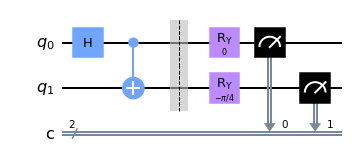

(x,y) = (0,1)


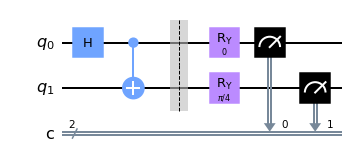

(x,y) = (1,0)


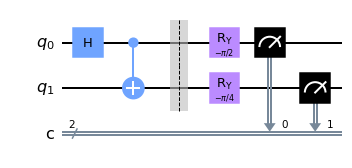

(x,y) = (1,1)


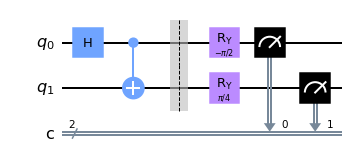

In [2]:
# Draw the four possible circuits

print(f"(x,y) = (0,0)")
display(chsh_circuit(0, 0).draw())

print(f"(x,y) = (0,1)")
display(chsh_circuit(0, 1).draw())

print(f"(x,y) = (1,0)")
display(chsh_circuit(1, 0).draw())

print(f"(x,y) = (1,1)")
display(chsh_circuit(1, 1).draw())

Next we'll define a job using the Aer simulator, which runs the circuit for a given pair of questions $(x,y)$ a single time.

In [4]:
from qiskit_aer import AerSimulator
simulator = AerSimulator()

def quantum_strategy(x, y):
    job = simulator.run(chsh_circuit(x, y),
                        shots=1,  # run the circuit once
                        memory=True)  # enables `.get_memory()`
    result = job.result().get_memory()[0]
    a, b = result[0], result[1]
    return a, b

Calling the function `quantum_strategy` runs the strategy one time on a given pair of questions.

In [8]:
quantum_strategy(1,1)

('0', '1')

To test out how well it does in the CHSH game, let's define a function that implements the game, including the random selection of the question bits. It takes an arbitrary strategy as an argument.

In [9]:
from numpy.random import randint

def chsh_game(strategy):
    # Referee chooses x and y randomly
    x, y = randint(0, 2), randint(0, 2)
    
    # Use strategy to choose a and b
    a, b = strategy(x, y)
    
    # Referee decides if Alice and Bob win or lose
    if (a != b) == (x & y):
        return 1  # Win
    return 0  # Lose

Finally, we can pass our strategy as the argument to the `CHSH_game` function to play the game.
Let's play 1,000 times and see what fraction of games it wins.

In [10]:
NUM_GAMES = 1000
total_score = 0

for _ in range(NUM_GAMES):
    total_score += chsh_game(quantum_strategy)

print(f"Fraction of games won:", total_score/NUM_GAMES)

Fraction of games won: 0.859


We can also define a classical strategy and see how it compares. (Feel free to change the code to try out different strategies.)

In [16]:
def classical_strategy(x, y):

    # Alice's answer
    if (x == 0): a = 0
    elif (x == 1): a = 1

    # Bob's answer    
    if (y == 0): b = 1
    elif (y == 1): b = 0
        
    return a, b

Again let's play the game 1,000 times to see how well it works.

In [17]:
NUM_GAMES = 1000
total_score = 0

for _ in range(NUM_GAMES):
    total_score += chsh_game(classical_strategy)

print(f"Fraction of games won:", total_score/NUM_GAMES)

Fraction of games won: 0.751


## Discussion and further reading

(Link to UQIC Lesson 4.)

The CHSH game is sometimes used as a subroutine within cryptographic protocols, as a way to force untrusted parties to follow certain instructions.

- Ben W. Reichardt, Falk Unger, Umesh Vazirani. A classical leash for a quantum system: Command of quantum systems via rigidity of CHSH games. arXiv:1209.0448

- Coladangelo, Andrea; Grilo, Alex; Jeffery, Stacey; Vidick, Thomas (January 9, 2020). "Verifier-on-a-Leash: new schemes for verifiable delegated quantum computation, with quasilinear resources". arXiv:1708.07359
 
- Grilo, Alex B. (June 5, 2020). "A simple protocol for verifiable delegation of quantum computation in one round". arXiv:1711.09585
 
- Vazirani, Umesh V.; Vidick, Thomas (November 25, 2011). "Certifiable Quantum Dice - Or, testable exponential randomness expansion". arXiv:1111.6054 
 
- Vazirani, Umesh; Vidick, Thomas (September 29, 2014). "Fully device independent quantum key distribution". Physical Review Letters. 113 (14): 140501. arXiv:1210.1810. doi:10.1103/PhysRevLett.113.140501. PMID 25325625. S2CID 119299119 

